## Fractals

A fractal is a geometric shape that looks similar at any arbitrary scale (**self-similarity**). They can be created in differents ways. Here, we'll focus on **recursive algorithms**.

In this method we need basically three parameters: the **coordinates** of the **starting** and **ending** points of an interval and the **level** of the fractal, namely the number of times we want to repeat the algorithm. So, with the starting and ending points we compute the coordinates of the next interval(s) and we call again the function, decreasing by 1 the value of the level. 

Let's start with a straightforward example.

In [1]:
import matplotlib.pyplot as plt

In [2]:
def fractal_curve(starting, ending, level):
    
    #starting = [x_i, y_i]
    #ending = [x_f, y_f]
    #level = integer number
    
    #Last level. We plot a line segment.
    if level == 1:
        
        x_points = [starting[0], ending[0]]
        y_points = [starting[1], ending[1]]
        
        plt.plot(x_points, y_points, 'black')
    
    else:
        
        #We compute the coordinates of an intermediate point
        x_c = starting[0] + (ending[0] - starting[0])/2 - (ending[1] - starting[1])/2
        y_c = starting[1] + (ending[0] - starting[0])/2 + (ending[1] - starting[1])/2
        
        #We call recursively the function for every new interval
        
        fractal_curve(starting, [x_c, y_c] , level-1)
        fractal_curve([x_c, y_c], ending, level-1)

In [40]:
#Initial conditions of the fractal
start = [0,0]
end = [1,0]
lvl = 12

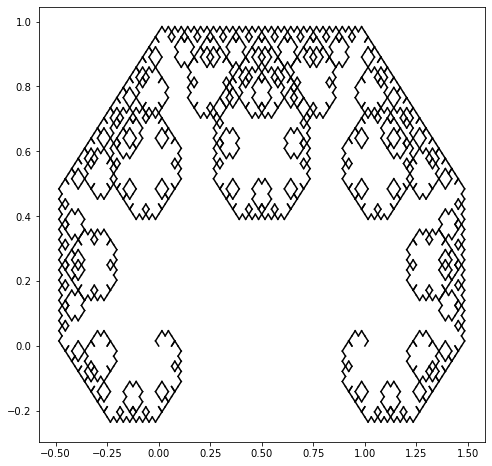

In [41]:
#Plotting the fractal
plt.figure(figsize=(8,8))

fractal_curve(start, end, lvl)

Now, we're going to construct a well known fractal: the **Koch snowflake**. The algorithm is the same. The only difference will be the way we define the intervals. So, to create the Koch snowflake we begin with a line segment. We divide this line segment into three segments of equal lenght. Then, we take the middle line segment and we draw on it an equilateral triangle pointing outwards. We repeat this process for every new line segment as many times as desired. 

In [5]:
from math import sqrt

In [6]:
def koch_curve(starting, ending, level):
    
    #starting = [x_i, y_i]
    #ending = [x_f, y_f]
    #level = integer number
    
    #Last level. We plot a line segment.
    if level == 1:
        
        x_points = [starting[0], ending[0]]
        y_points = [starting[1], ending[1]]
        
        plt.plot(x_points, y_points, 'black')
    
    else:
        
        x = ending[0] - starting[0]
        y = ending[1] - starting[1]
        
        #Coordinates of the base's points of the eq. triangle
        x1 = starting[0] + x/3
        y1 = starting[1] + y/3
        
        x3 = starting[0] + x*2/3
        y3 = starting[1] + y*2/3
        
        #Coordinates of the last point of the eq. triangle 
        x2 = (x1 + x3 + sqrt(3)*(y1 - y3))/2
        y2 = (y1 + y3 - sqrt(3)*(x1 -x3))/2
        
        koch_curve(starting, [x1, y1] , level-1)
        koch_curve([x1, y1], [x2, y2], level-1)
        koch_curve([x2, y2], [x3, y3], level-1)
        koch_curve([x3, y3], ending, level-1)

In [7]:
#Initial conditions of the fractal
start = [0,0]
end = [1,0]
lvl = 5

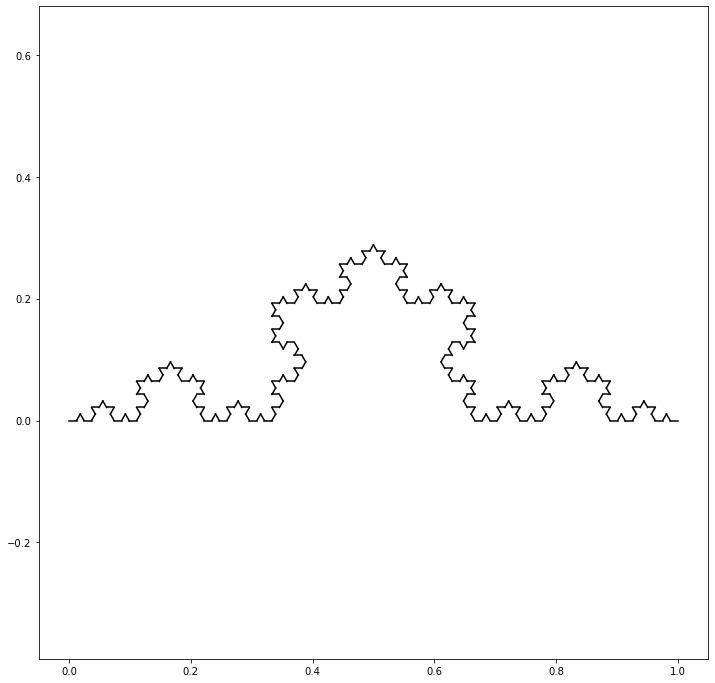

In [8]:
#Plotting the fractal
plt.figure(figsize=(12,12))
plt.axis('equal')

koch_curve(start, end, lvl)

Actually, this is not the Koch snowflake, but a part of it. To create the full Koch snowflake, we call the "koch_curve" function 3 times. 

In [20]:
#Initial conditions of the Koch snowflake
start1 = [1,0]
end1 = [0,0]

start2 = [0,0]
end2 = [0.5, 0.5*sqrt(3)]

start3 = [0.5, 0.5*sqrt(3)]
end3 = [1,0]


lvl = 6

In [21]:
plt.figure( figsize=(12,12))
plt.axis('equal')

koch_curve(start1, end1, lvl)
koch_curve(start2, end2, lvl)
koch_curve(start3, end3, lvl)

plt.savefig('koch.png')

Let's see one last fractal, also well known. The **dragon curve**. There are many ways to construct this fractal. One of them is as follows:

* Suppose a line segment in the XY-plane.
* Apply a rotation (z-axis) around one of the ends of the segment and extend the curve with the new point.
* Apply again the rotation around one of the ends of the new curve obtained in the last step. 
* Repeat as many times as desired.


In [11]:
import numpy as np

In [12]:
def dragon_curve(points, level, angle):
    
    if level == 1:
        
        for i in range(len(points)-1):
            
            x_values = [points[i][0], points[i+1][0]]
            y_values = [points[i][1], points[i+1][1]]
            
            plt.plot(x_values, y_values, 'black')
    
    else:
        
        #We take the last point
        last_point = points[-1]
        new_points = []
        
        for point in points:
            
            #The last point is invariant under rotations
            if point == last_point:
                pass
            
            else:
                #x-coordinate of the point under a rotation of {angle} rad. around the last point
                new_x = last_point[0] + (point[0] - last_point[0])*np.cos(angle) - (point[1] - last_point[1])*np.sin(angle)
                
                #y-coordinate of the point under a rotation of {angle} rad. around the last point
                new_y = last_point[1] + (point[0] - last_point[0])*np.sin(angle) + (point[1] - last_point[1])*np.cos(angle)
                
                new_points.append([new_x, new_y])
        
        #We have to reverse the list of points in order to plot the figure correctly
        new_points.reverse()
        
        points.extend(new_points)

        dragon_curve(points, level-1, angle)

In [27]:
#Initial conditions
start= [0,0]
end = [1,0]
lvl = 14
angle = 90

points = [start, end]
angle = angle*np.pi/180

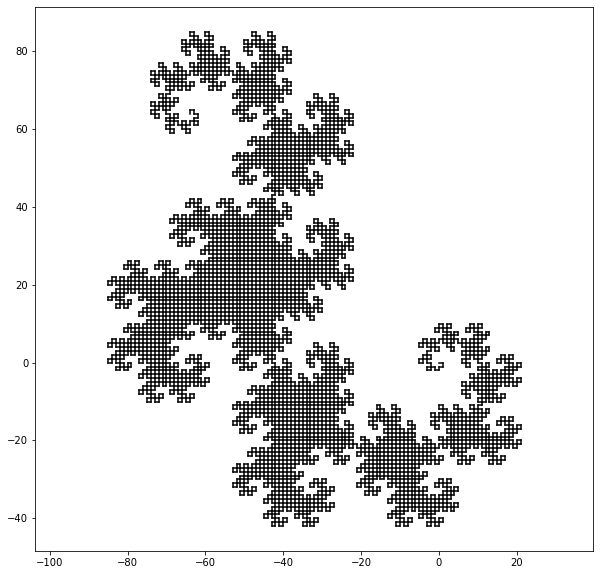

In [28]:
plt.figure( figsize=(10,10))
plt.axis('equal')

dragon_curve(points, lvl, angle)
plt.savefig('dragon_curve.png')

#### Fractal dimension

The **fractal dimension** is a ratio that quantifies the complexity of a pattern with changes in the scale. Let's suppose we have a square of length $L$ and area $A$. How much change the area when we increase its lenght  by a factor of 2? Easy. We know that the area of a square is $L^2$ so, when we increase its lenght by a factor of 2 (2L) we have that $A' = 4L^2$, four times the initial area. Thus, $A'(2L) = 2^2 A(L)$.

Generalizing this idea we have

$$ M(\lambda L) = \lambda^D M(L) \tag{1}$$

where $M$ is the **measure** of the object (length, area, volume, mass...), $\lambda$ is the **scale factor**, and $D$ is the **fractal dimension**. So, we've seen that for a square, its fractal dimension is 2, as one would expect.  However, for fractals, we get counterintuitive results. Let's see an example.

In the case of the Koch snowflake, when we reduce the scale factor by 3 we get 4 similar pieces. Rearranging the equation [1] we have that

$$ D = \frac{\ln(M(\lambda L)/M(L))}{\ln(\lambda)} \equiv \frac{\ln(N)}{\ln(\lambda)}  $$

So, for the Koch snowflake we have that its fractal dimension is $D = \frac{ln(4)}{ln(3)} \approx 1.262...$  which is NOT an integer number.

This example was quite simple, but for some other examples, calculating the fractal dimension analytically can be very complex (not to say impossible). So, one would like to find a way to compute the fractal dimension numerically. 

One way of doing that is with the metho known as **box counting method** or **Minkowski–Bouligand dimension**. Suppose we have a fractal in a 2-dimensional (uniform) grid. This method consists in counting how many boxes are required to cover the fractal. So, the fractal dimension is compute as

$$ D = \lim_{\epsilon \to 0} \frac{\log N(\epsilon)}{\log (1/\epsilon)}$$

where $N(\epsilon)$ is the required number of boxes and $\epsilon$ the side length of the box. 



In [ ]:
from PIL import Image
import scipy

In [38]:
#RGB image to grayscale image
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def fractal_dimension(img, threshold=0.9):
    # Only for 2d image
    assert(len(img.shape) == 2)

    def boxcount(img, k):
        S = np.add.reduceat(
            np.add.reduceat(img, np.arange(0, img.shape[0], k), axis=0),
                               np.arange(0, img.shape[1], k), axis=1)
        

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    # Transform Z into a binary array
    img = (img < threshold)

    # Minimal dimension of image
    p = min(img.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(img, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]


In [36]:
#'Reading' the fractal image
from matplotlib.pyplot import imread
im = imread("koch.png")

In [39]:
im_gray = rgb2gray(im)
fractal_dimension(im_gray)

1.2561101660322571

So, using the box-counting method we get that the fractal dimension of the Koch snowflake is 1.256 approx. compared to the 1.262... we got analytically, which proves to be a good approximation. Keep in mind, however, that we are not only limited by the box_counting method itself, but also by the "level" of the fractal, the image resolution...